In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [2]:
import math

# Question 1

In [3]:
df_survey = pd.read_csv("https://cocl.us/datascience_survey_data", index_col=0)
df_survey.head()

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


# Question 2
> Use the artist layer of Matplotlib to replicate the bar chart below to visualize the percentage of the respondents' interest in the different data science topics surveyed.

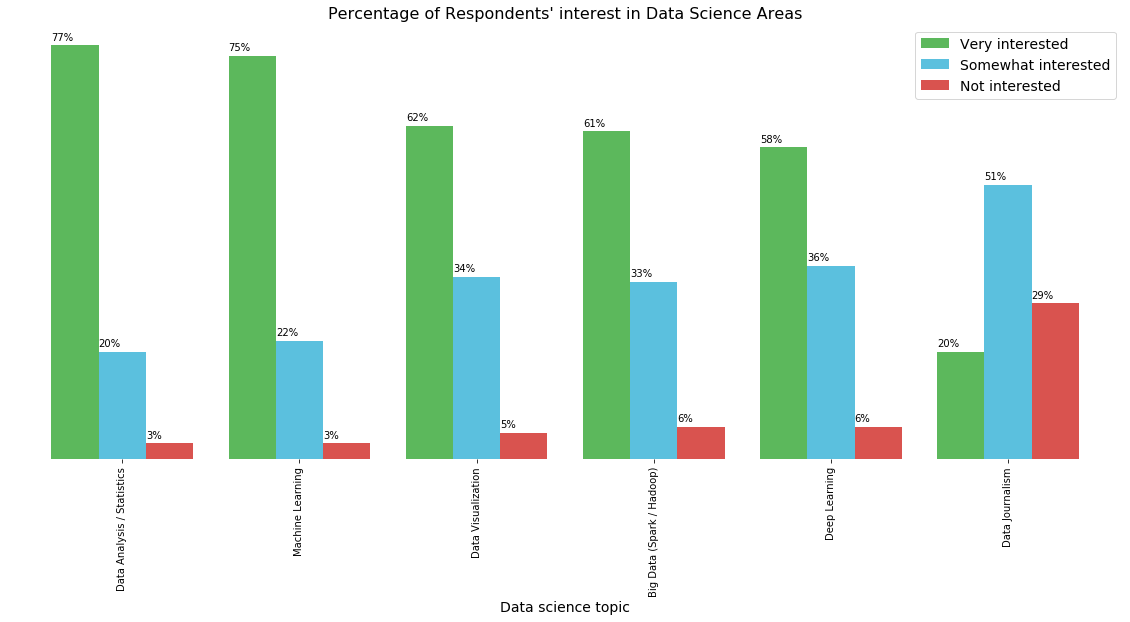

In [4]:
df_survey_sorted = df_survey.sort_values('Very interested', ascending = False)
df_survey_sorted = round(df_survey_sorted.div(df_survey_sorted.sum(1), axis=0),2)
ax = df_survey_sorted.plot(kind='bar',figsize=(20,8),width = 0.8,color = ['#5cb85c', '#5bc0de', '#d9534f'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
ax.set_xlabel("Data science topic",fontsize=14)
ax.legend(prop={'size': 14})
ax.set_title("Percentage of Respondents' interest in Data Science Areas", fontsize=16)
# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))

In [6]:
df_survey_sorted

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,0.77,0.20,0.03
Machine Learning,0.75,0.22,0.03
Data Visualization,0.62,0.34,0.05
Big Data (Spark / Hadoop),0.61,0.33,0.06
Deep Learning,0.58,0.36,0.06
Data Journalism,0.20,0.51,0.29


In [5]:
df_survey_sorted.sum(axis=1)

Data Analysis / Statistics    1.00
Machine Learning              1.00
Data Visualization            1.01
Big Data (Spark / Hadoop)     1.00
Deep Learning                 1.00
Data Journalism               1.00
dtype: float64

In [7]:
df_survey_sorted.div(df_survey_sorted.sum(1), axis=0)

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,0.770000,0.200000,0.030000
Machine Learning,0.750000,0.220000,0.030000
Data Visualization,0.613861,0.336634,0.049505
Big Data (Spark / Hadoop),0.610000,0.330000,0.060000
Deep Learning,0.580000,0.360000,0.060000
Data Journalism,0.200000,0.510000,0.290000


In [7]:
df_police = pd.read_csv("https://cocl.us/sanfran_crime_dataset")

In [8]:
df_police.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [9]:
sf_neighborhood = df_police[['PdDistrict']].groupby('PdDistrict').size().to_frame()
sf_neighborhood.reset_index(inplace=True)
sf_neighborhood.columns = ['Neighborhood', 'Count']
sf_neighborhood

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [11]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium
from folium import plugins

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pandas-0.24.2              |   py36hf484d3e_0        11.1 MB  conda-forge
    requests-2.23.0            |     pyh8c360ce_2          47 KB  conda-forge
    jsonschema-3.2.0           |   py36h9f0ad1d_1          89 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    folium-0.5.0               |             py_0   

In [12]:
# download countries geojson file
!wget --quiet https://cocl.us/sanfran_geojson -O san-francisco.geojson
    
print('GeoJSON file downloaded!')

sf_file = r'san-francisco.geojson'



GeoJSON file downloaded!


In [14]:

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(sf_neighborhood['Count'].min(),
                              sf_neighborhood['Count'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
sf_map = folium.Map(location=[37.7749, -122.4194], zoom_start=12)
sf_map.choropleth(
    geo_data=sf_file,
    data=sf_neighborhood,
    columns=['Neighborhood', 'Count'],
    key_on='features.properties.DISTRICT',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco',
    reset=True
)
sf_map

AttributeError: 'NoneType' object has no attribute 'get'